In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mysql.connector as connector
from mysql.connector import Error

In [2]:
try:
    conn = connector.connect(host = "relational.fit.cvut.cz", user = "guest", password = "relational", database = "GOSales")

    if conn.is_connected():           # cek apakah sudah terkoneksi
        print("MySQL is connected")
        cursor = conn.cursor()        # membuat cursor untuk eksekusi query pada proses2 berikutnya

except Error as e:
    print("Error while connecting to MySQL", e)

MySQL is connected


In [ ]:
query = "SHOW TABLES"
pd.read_sql(query, con = conn)

In [7]:
#1 (cadangan) Mencari tahun dengan penjualan terbanyak
query = """
    SELECT Date AS Year, SUM(Quantity) AS `Amount Product` FROM go_daily_sales
    GROUP BY Date 
"""

df = pd.read_sql(query, con = conn)
df.head(10)

,Year,Amount Product
0,2015-01-12,196746.0
1,2015-01-13,69966.0
2,2015-01-14,7711.0
3,2015-01-15,6177.0
4,2015-01-16,7585.0
5,2015-01-19,7491.0
6,2015-01-20,8977.0
7,2015-01-21,12252.0
8,2015-01-22,33971.0
9,2015-01-23,11630.0


In [3]:
#1 Mencari tahun dengan penjualan terbanyak
query_2015 = """
    SELECT SUM(Quantity)
    FROM go_daily_sales
    WHERE Date LIKE "%2015%"
"""

query_2016 = """
    SELECT SUM(Quantity)
    FROM go_daily_sales
    WHERE Date LIKE "%2016%"
"""

query_2017 = """
    SELECT SUM(Quantity)
    FROM go_daily_sales
    WHERE Date LIKE "%2017%"
"""

query_2018 = """
    SELECT SUM(Quantity)
    FROM go_daily_sales
    WHERE Date LIKE "%2018%"
"""

tahun_2015= pd.read_sql(query_2015, con = conn)
tahun_2016= pd.read_sql(query_2016, con = conn)
tahun_2017= pd.read_sql(query_2017, con = conn)
tahun_2018= pd.read_sql(query_2018, con = conn)

data = {'Tahun':[2015,2016,2017,2018],' Total Penjualan':[tahun_2015,tahun_2016,tahun_2017,tahun_2018]}
df = pd.DataFrame(data)
df

,Tahun,Total Penjualan
0,2015,SUM(Quantity) 0 4316585.0
1,2016,SUM(Quantity) 0 5419586.0
2,2017,SUM(Quantity) 0 5750179.0
3,2018,SUM(Quantity) 0 4309597.0


In [82]:
excel_file = pd.ExcelWriter("Tahun_penjualan.xlsx")
df.to_excel(excel_file)
excel_file.save()

In [45]:
df = pd.read_excel('C:/Users/salik/Downloads/Tahun_penjualan.xlsx')
df

,Unnamed: 0,Tahun,Total Penjualan
0,NaN,2015,4316585
1,NaN,2016,5419586
2,NaN,2017,5750179
3,NaN,2018,4309597


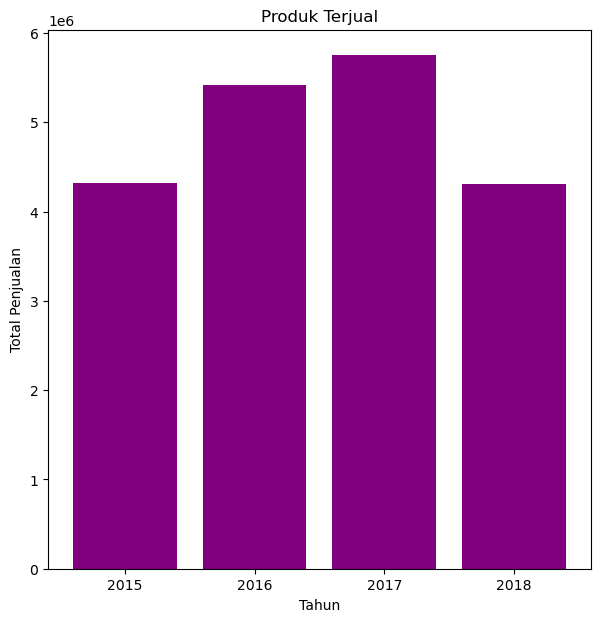

In [62]:
df["Tahun"] = df["Tahun"].astype("string")
year = df['Tahun']
amount_sold = df[' Total Penjualan']

# Figure Size
fig = plt.figure(figsize =(7, 7))

# Horizontal Bar Plot
plt.bar(year, amount_sold, color ='purple')
plt.xlabel("Tahun")
plt.ylabel("Total Penjualan")
plt.title("Produk Terjual")

# Show Plot
plt.show()

In [14]:
#2 Mencari banyaknya jenis produk yang terjual 
query = """
    SELECT go_products.`Product type`,COUNT(go_products.`Product number`) AS `Amount Sold`
    FROM go_products
    JOIN go_daily_sales ON go_products.`Product number` = go_daily_sales.`Product number`
    GROUP BY go_products.`Product type`
    ORDER BY COUNT(go_products.`Product number`) DESC
    LIMIT 5
"""

df = pd.read_sql(query, con = conn)
df

,Product type,Amount Sold
0,Eyewear,65609
1,Watches,41114
2,Navigation,4999
3,Binoculars,3693
4,Lanterns,3640


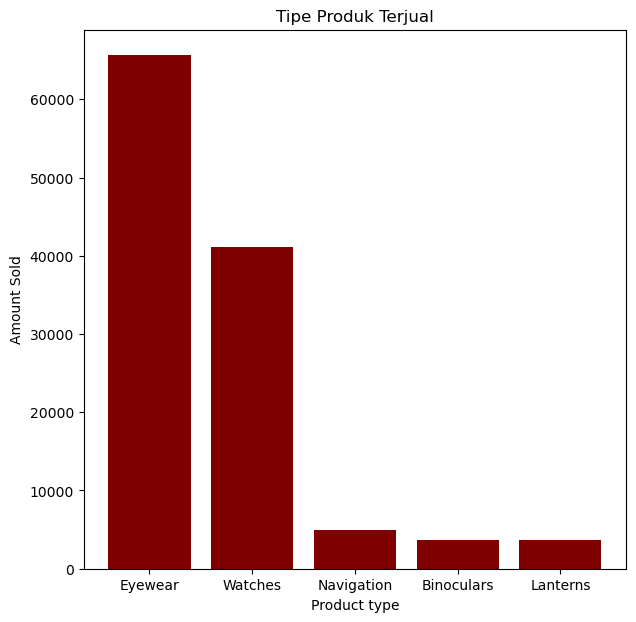

In [16]:
product = df['Product type']
amount_sold = df['Amount Sold']

# Figure Size
fig = plt.figure(figsize =(7, 7))

# Horizontal Bar Plot
plt.bar(product, amount_sold, color ='maroon')
plt.xlabel("Product type")
plt.ylabel("Amount Sold")
plt.title("Tipe Produk Terjual")

# Show Plot
plt.show()

In [97]:
excel_file = pd.ExcelWriter("top5_jenisproduk.xlsx")
df.to_excel(excel_file)
excel_file.save()

In [71]:
#3 Mencari negara dengan penjualan terbanyak
query = """
    SELECT go_retailers.Country, COUNT(go_daily_sales.Quantity) AS `Sold Product`
    FROM go_daily_sales
    JOIN go_retailers ON go_daily_sales.`Retailer code`= go_retailers.`Retailer code`
    GROUP BY go_retailers.Country
    ORDER BY `Sold Product` DESC
    LIMIT 5
"""

df = pd.read_sql(query, con = conn)
df.head(10)

,Country,Sold Product
0,United States,32833
1,Germany,11508
2,United Kingdom,11221
3,Canada,10900
4,France,9509


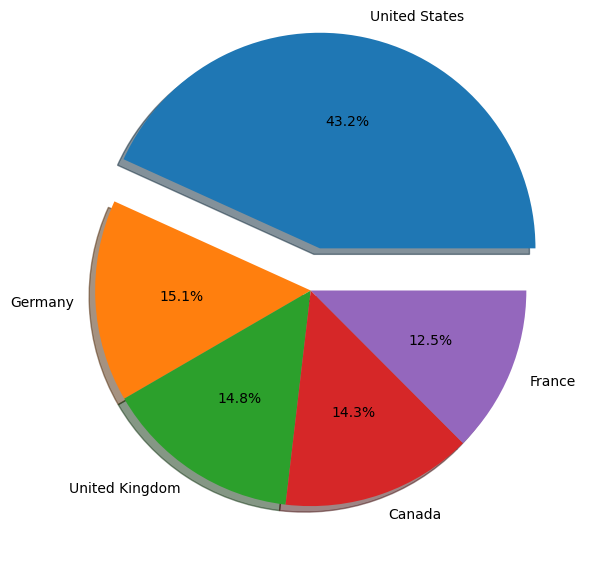

In [73]:
y = df['Sold Product']
country = df['Country']
myexplode = [0.2, 0, 0, 0, 0]

fig = plt.figure(figsize =(7, 7))

plt.pie(y, labels = country, explode = myexplode, autopct="%1.1f%%",shadow = True)
plt.show()

In [108]:
excel_file = pd.ExcelWriter("negara.xlsx")
df.to_excel(excel_file)
excel_file.save()

In [77]:
#4 Metode Pemesanan yang sering digunakan
query ="""
    SELECT `Order method type` , count(`Product number`) AS `Amount Product` 
    FROM go_daily_sales
    JOIN go_methods ON go_daily_sales.`Order method code`= go_methods.`Order method code`
    GROUP BY `Order method type` 
    ORDER BY count(`Product number`) DESC
    LIMIT 4
"""

df = pd.read_sql(query, con = conn)
df

,Order method type,Amount Product
0,Web,124225
1,Telephone,12404
2,E-mail,7388
3,Sales visit,3661


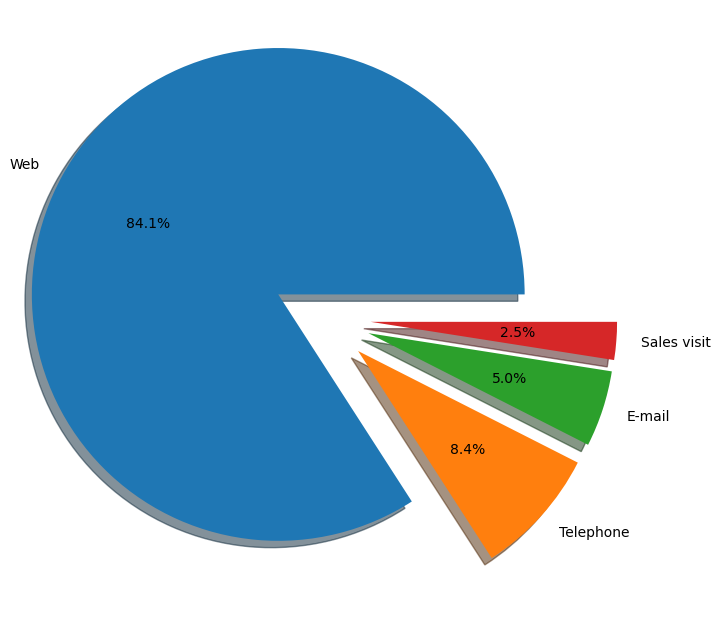

In [80]:
plt.figure(figsize = (8,8))
myexplode = [0.2, 0.2, 0.2, 0.2]

plt.pie(df['Amount Product'],
    labels=df['Order method type'], 
    autopct="%1.1f%%", shadow = True, explode = myexplode 
    )
plt.show()

makanya mesen pake web goblok

In [101]:
excel_file = pd.ExcelWriter("metode.xlsx")
df.to_excel(excel_file)
excel_file.save()